In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '3'

In [2]:
MODEL_NAME = 'qa_accept_cogito_skips_03-04-2020_stratified'
MODEL_PATH = os.path.join('/root/data/sid/skip_classifier_checkpoints/', MODEL_NAME)
SPLIT_PATH = os.path.join('/root/data/sid/skip_classifier_datasets/splits', MODEL_NAME + '_splits.json')

In [3]:
import torch

torch.cuda.is_available()

True

In [4]:
device = 0
torch.cuda.set_device(device)

### Pick Best Model Using Validation Metrics

In [5]:
import json

best_epoch ={'precision':(0, None, None), 'recall': (0, None, None), 'auc': (0, None, None)}

for epoch in os.listdir(MODEL_PATH):
    metrics_path = os.path.join(MODEL_PATH, epoch, 'val', 'metrics.json')
    metrics = json.load(open(metrics_path))['acc']
    for m in best_epoch:
        if metrics[m] > best_epoch[m][0]:
            best_epoch[m] = (metrics[m], metrics, epoch)

In [6]:
best_epoch

{'precision': (0.8642857142857143,
  {'precision': 0.8642857142857143,
   'recall': 0.8005671077504726,
   'auc': 0.9483560806180613},
  'epoch_5'),
 'recall': (0.9234404536862004,
  {'precision': 0.7395912187736563,
   'recall': 0.9234404536862004,
   'auc': 0.9396057634155693},
  'epoch_2'),
 'auc': (0.9523500372817733,
  {'precision': 0.8096040438079192,
   'recall': 0.9083175803402647,
   'auc': 0.9523500372817733},
  'epoch_13')}

In [7]:
BEST_EPOCH = best_epoch['auc']

### Reconstruct Test Set

In [8]:
import json

splits = json.load(open(SPLIT_PATH))
splits.keys()

dict_keys(['original', 'train_indices', 'val_indices', 'test_indices'])

In [9]:
test_set = [splits['original'][i] for i in splits['test_indices']]
len(test_set)

2751

In [10]:
all_image_files = [x[0] for x in test_set]
all_metadata_files = [s.replace('_crop.jpg', '_metadata.json') for s in all_image_files]
all_metadata_data = []
for i, (metadata_path, image_path) in enumerate(zip(all_metadata_files, all_image_files)):
    if i % 100 == 0:
        print(i)
    assert metadata_path.split('/')[-1].split('_')[0] == image_path.split('/')[-1].split('_')[0], (metadata_path, image_path)
    metadata = json.load(open(metadata_path))
    metadata['local_image_path'] = image_path
    all_metadata_data.append(metadata)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700


In [12]:
import pandas as pd

eval_dataset = pd.DataFrame.from_dict(all_metadata_data)
eval_dataset

,Unnamed: 0,service_id,pen_id,annotation_state_id,base_key,url_key,right_crop_url,left_crop_metadata,right_crop_metadata,camera_metadata,...,ts_source_start,ts_source_end,ts,annotator_email,skip_reasons,group_id,left_crop_url,filter_reasons,label,local_image_path
0,913418,1,60,4,environment=production/site-id=39/pen-id=60/da...,https://aquabyte-crops.s3.eu-west-1.amazonaws....,None,"{""width"": 3094, ""height"": 1298, ""x_coord"": 84,...",None,"{""baseline"": 0.1017976434480721, ""focalLength""...",...,2019-11-21 08:08:50+00,None,2019-11-21 08:08:50.973+00,labeler2@cogitotech.com,"[""BAD_ORIENTATION""]",60,https://aquabyte-crops.s3.eu-west-1.amazonaws....,None,SKIP,/root/data/sid/skip_classifier_datasets/model_...
1,509375,1,66,4,environment=production/site-id=44/pen-id=66/da...,https://aquabyte-crops.s3.eu-west-1.amazonaws....,None,"{""width"": 1476, ""height"": 1494, ""x_coord"": 138...",None,"{""baseline"": 0.1015060646153997, ""focalLength""...",...,2020-01-08 10:22:48+00,None,2020-01-08 10:22:48.467+00,labeler2@cogitotech.com,"[""TOO_DARK"", ""BLURRY""]",66,https://aquabyte-crops.s3.eu-west-1.amazonaws....,None,SKIP,/root/data/sid/skip_classifier_datasets/model_...
2,1142150,1,59,4,environment=production/site-id=39/pen-id=59/da...,https://aquabyte-crops.s3.eu-west-1.amazonaws....,None,"{""width"": 1645, ""height"": 1060, ""x_coord"": 693...",None,"{""baseline"": 0.10152162251919987, ""focalLength...",...,2019-11-22 14:36:30+00,None,2019-11-22 14:36:30.67+00,labeler4@cogitotech.com,"[""BAD_CROP""]",59,https://aquabyte-crops.s3.eu-west-1.amazonaws....,None,SKIP,/root/data/sid/skip_classifier_datasets/model_...
3,91712,1,56,7,environment=production/site-id=39/pen-id=56/da...,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,"{""width"": 4061, ""height"": 2485, ""x_coord"": 0, ...","{""width"": 3302, ""height"": 2476, ""x_coord"": 0, ...","{""baseline"": 0.10169764808546222, ""focalLength...",...,2020-02-08 08:29:14+00,None,2020-02-08 08:29:15.39+00,orjan@aquabyte.ai,None,56,https://aquabyte-crops.s3.eu-west-1.amazonaws....,None,ACCEPT,/root/data/sid/skip_classifier_datasets/model_...
4,854699,1,37,4,environment=production/site-id=32/pen-id=37/da...,https://aquabyte-crops.s3.eu-west-1.amazonaws....,None,"{""width"": 3721, ""height"": 1492, ""x_coord"": 0, ...",None,"{""baseline"": 0.10134064199428348, ""focalLength...",...,2019-11-27 09:41:55+00,None,2019-11-27 09:41:56.155+00,labeler8@cogitotech.com,"[""BAD_CROP"", ""BLURRY""]",37,https://aquabyte-crops.s3.eu-west-1.amazonaws....,None,SKIP,/root/data/sid/skip_classifier_datasets/model_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2746,518371,1,60,7,environment=production/site-id=39/pen-id=60/da...,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,"{""width"": 3872, ""height"": 1748, ""x_coord"": 223...","{""width"": 3554, ""height"": 1762, ""x_coord"": 0, ...","{""baseline"": 0.1017976434480721, ""focalLength""...",...,2020-02-19 14:34:53+00,None,2020-02-19 14:34:54.125+00,gunnar@aquabyte.ai,None,60,https://aquabyte-crops.s3.eu-west-1.amazonaws....,None,ACCEPT,/root/data/sid/skip_classifier_datasets/model_...
2747,989453,1,60,4,environment=production/site-id=39/pen-id=60/da...,https://aquabyte-crops.s3.eu-west-1.amazonaws....,None,"{""width"": 2378, ""height"": 1122, ""x_coord"": 0, ...",None,"{""baseline"": 0.1017976434480721, ""focalLength""...",...,2019-12-10 07:15:23+00,None,2019-12-10 07:15:24.042+00,labeler10@cogitotech.com,"[""BLURRY""]",60,https://aquabyte-crops.s3.eu-west-1.amazonaws....,None,SKIP,/root/data/sid/skip_classifier_datasets/model_...
2748,158771,1,56,7,environment=production/site-id=39/pen-id=56/da...,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,"{""width"": 2989, ""height"": 1659, ""x_coord"": 784...","{""width"": 2603, ""height"": 1545, ""x_coord"": 181.

In [13]:
eval_dataset = eval_dataset.drop_duplicates('left_crop_url')

In [14]:
eval_dataset

,Unnamed: 0,service_id,pen_id,annotation_state_id,base_key,url_key,right_crop_url,left_crop_metadata,right_crop_metadata,camera_metadata,...,ts_source_start,ts_source_end,ts,annotator_email,skip_reasons,group_id,left_crop_url,filter_reasons,label,local_image_path
0,913418,1,60,4,environment=production/site-id=39/pen-id=60/da...,https://aquabyte-crops.s3.eu-west-1.amazonaws....,None,"{""width"": 3094, ""height"": 1298, ""x_coord"": 84,...",None,"{""baseline"": 0.1017976434480721, ""focalLength""...",...,2019-11-21 08:08:50+00,None,2019-11-21 08:08:50.973+00,labeler2@cogitotech.com,"[""BAD_ORIENTATION""]",60,https://aquabyte-crops.s3.eu-west-1.amazonaws....,None,SKIP,/root/data/sid/skip_classifier_datasets/model_...
1,509375,1,66,4,environment=production/site-id=44/pen-id=66/da...,https://aquabyte-crops.s3.eu-west-1.amazonaws....,None,"{""width"": 1476, ""height"": 1494, ""x_coord"": 138...",None,"{""baseline"": 0.1015060646153997, ""focalLength""...",...,2020-01-08 10:22:48+00,None,2020-01-08 10:22:48.467+00,labeler2@cogitotech.com,"[""TOO_DARK"", ""BLURRY""]",66,https://aquabyte-crops.s3.eu-west-1.amazonaws....,None,SKIP,/root/data/sid/skip_classifier_datasets/model_...
2,1142150,1,59,4,environment=production/site-id=39/pen-id=59/da...,https://aquabyte-crops.s3.eu-west-1.amazonaws....,None,"{""width"": 1645, ""height"": 1060, ""x_coord"": 693...",None,"{""baseline"": 0.10152162251919987, ""focalLength...",...,2019-11-22 14:36:30+00,None,2019-11-22 14:36:30.67+00,labeler4@cogitotech.com,"[""BAD_CROP""]",59,https://aquabyte-crops.s3.eu-west-1.amazonaws....,None,SKIP,/root/data/sid/skip_classifier_datasets/model_...
3,91712,1,56,7,environment=production/site-id=39/pen-id=56/da...,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,"{""width"": 4061, ""height"": 2485, ""x_coord"": 0, ...","{""width"": 3302, ""height"": 2476, ""x_coord"": 0, ...","{""baseline"": 0.10169764808546222, ""focalLength...",...,2020-02-08 08:29:14+00,None,2020-02-08 08:29:15.39+00,orjan@aquabyte.ai,None,56,https://aquabyte-crops.s3.eu-west-1.amazonaws....,None,ACCEPT,/root/data/sid/skip_classifier_datasets/model_...
4,854699,1,37,4,environment=production/site-id=32/pen-id=37/da...,https://aquabyte-crops.s3.eu-west-1.amazonaws....,None,"{""width"": 3721, ""height"": 1492, ""x_coord"": 0, ...",None,"{""baseline"": 0.10134064199428348, ""focalLength...",...,2019-11-27 09:41:55+00,None,2019-11-27 09:41:56.155+00,labeler8@cogitotech.com,"[""BAD_CROP"", ""BLURRY""]",37,https://aquabyte-crops.s3.eu-west-1.amazonaws....,None,SKIP,/root/data/sid/skip_classifier_datasets/model_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2746,518371,1,60,7,environment=production/site-id=39/pen-id=60/da...,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,"{""width"": 3872, ""height"": 1748, ""x_coord"": 223...","{""width"": 3554, ""height"": 1762, ""x_coord"": 0, ...","{""baseline"": 0.1017976434480721, ""focalLength""...",...,2020-02-19 14:34:53+00,None,2020-02-19 14:34:54.125+00,gunnar@aquabyte.ai,None,60,https://aquabyte-crops.s3.eu-west-1.amazonaws....,None,ACCEPT,/root/data/sid/skip_classifier_datasets/model_...
2747,989453,1,60,4,environment=production/site-id=39/pen-id=60/da...,https://aquabyte-crops.s3.eu-west-1.amazonaws....,None,"{""width"": 2378, ""height"": 1122, ""x_coord"": 0, ...",None,"{""baseline"": 0.1017976434480721, ""focalLength""...",...,2019-12-10 07:15:23+00,None,2019-12-10 07:15:24.042+00,labeler10@cogitotech.com,"[""BLURRY""]",60,https://aquabyte-crops.s3.eu-west-1.amazonaws....,None,SKIP,/root/data/sid/skip_classifier_datasets/model_...
2748,158771,1,56,7,environment=production/site-id=39/pen-id=56/da...,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,"{""width"": 2989, ""height"": 1659, ""x_coord"": 784...","{""width"": 2603, ""height"": 1545, ""x_coord"": 181.

In [15]:
accepts = eval_dataset[eval_dataset['skip_reasons'].isnull()]
accepts.shape

(1038, 22)

In [16]:
accepts.pen_id.value_counts()

57    194
56    193
60    177
59    172
58    170
65     74
37     32
85     13
66     13
Name: pen_id, dtype: int64

In [17]:
skips = eval_dataset[eval_dataset['skip_reasons'].notnull()]
skips.shape

(1710, 22)

In [18]:
skips = skips.groupby('pen_id', group_keys=False).apply(lambda x: x.sample(min(len(x), 1000)))
skips.pen_id.value_counts()

37    269
57    229
59    212
60    201
58    196
66    190
65    187
56    183
85     43
Name: pen_id, dtype: int64

In [19]:
skips.shape

(1710, 22)

In [20]:
eval_set = pd.concat([skips, accepts])
eval_set = eval_set.sample(frac=1)
print(eval_set.pen_id.value_counts())
eval_set.shape

57    423
59    384
60    378
56    376
58    366
37    301
65    261
66    203
85     56
Name: pen_id, dtype: int64


(2748, 22)

In [21]:
import json

useful_labels = [
    'BLURRY',
    'BAD_CROP',
    'BAD_ORIENTATION',
    'OBSTRUCTION',
    'TOO_DARK'
]

eval_dataset['skip_reasons'] = eval_dataset['skip_reasons'].str.replace("'", "\"")
eval_dataset['skip_reasons'] = eval_dataset['skip_reasons'].apply(lambda l: l if l is None else json.loads(l))

/home/user/miniconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/user/miniconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [22]:
for i, label in enumerate(useful_labels):
    eval_set[f'{label}'] = eval_set['skip_reasons'].apply(lambda l: False if l is None else (label in l))

### Get Model Predictions

In [23]:
BEST_EPOCH

(0.9523500372817733,
 {'precision': 0.8096040438079192,
  'recall': 0.9083175803402647,
  'auc': 0.9523500372817733},
 'epoch_13')

In [24]:
from model import ImageClassifier
from train import ACCEPT_LABEL, SKIP_LABEL

path = os.path.join(MODEL_PATH, BEST_EPOCH[2], 'val', 'model.pt')
model = ImageClassifier([ACCEPT_LABEL, SKIP_LABEL], device=0, savename=None)
model.load_state_dict(torch.load(path))
model.to(device)

ImageClassifier(
  (model_ft): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runn

In [25]:
from torchvision import get_image_backend

get_image_backend()

'PIL'

In [26]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import cv2

IMG_EXTENSIONS = ('.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif', '.tiff', '.webp')

def albumentations_loader(file_path):
    # Read an image with OpenCV
    image = cv2.imread(file_path)

    # By default OpenCV uses BGR color space for color images,
    # so we need to convert the image to RGB color space.
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

class ImageDataset(Dataset):
    """"""
    def __init__(self, classes, samples, loader=albumentations_loader, extensions=None, transform=None,
                 target_transform=None, is_valid_file=None):
        if len(samples) == 0:
            raise (RuntimeError("Found 0 files in subfolders of: " + self.root + "\n"
                                "Supported extensions are: " + ",".join(extensions)))

        self.loader = loader
        self.transform = transform
        self.extensions = extensions

        self.classes = classes
        self.class_to_idx = {c: classes.index(c) for c in classes}
        self.samples = samples
        self.targets = [s[1] for s in samples]
        
    def __getitem__(self, index):
        """
        Args:
            index (int): Index

        Returns:
            tuple: (sample, target) where target is class_index of the target class.
        """
        path, target = self.samples[index]
        sample = albumentations_loader(path)
        if self.transform is not None:
            sample = self.transform(image=sample)['image']

        return sample, target
    
    def __len__(self):
        return len(self.samples)

In [27]:
classes = [ACCEPT_LABEL, SKIP_LABEL]
eval_set['paths'] = eval_set['local_image_path']
eval_set['labels'] = eval_set['skip_reasons'].notnull().apply(int)
samples = [(path, label) for path, label in zip(
            eval_set['paths'], eval_set['labels'])]
len(samples)

2748

In [28]:
from loader import TRANSFORMS

dataset = ImageDataset(classes, samples, transform=TRANSFORMS['pad'])
example = dataset[0]
print(example)
print(example[0].shape)

(tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.8044,  ..., -

In [29]:
import torch

loader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=False, num_workers=1)
loader

In [30]:
model.cuda()

ImageClassifier(
  (model_ft): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runn

In [31]:
all_labels = None
all_outputs = None

with torch.no_grad():
    for i, (inputs, tgts) in enumerate(loader):
        cuda_inputs = inputs.to(device)
        outputs = model(cuda_inputs)
        outputs = outputs.cpu()
        if all_outputs is None:
            all_outputs = outputs
            all_labels = tgts
        else:
            all_outputs = torch.cat([all_outputs, outputs])
            all_labels = torch.cat([all_labels, tgts])
        print(f'batch:{i}...')

batch:0...
batch:1...
batch:2...
batch:3...
batch:4...
batch:5...
batch:6...
batch:7...
batch:8...
batch:9...
batch:10...
batch:11...
batch:12...
batch:13...
batch:14...
batch:15...
batch:16...
batch:17...
batch:18...
batch:19...
batch:20...
batch:21...
batch:22...
batch:23...
batch:24...
batch:25...
batch:26...
batch:27...
batch:28...
batch:29...
batch:30...
batch:31...
batch:32...
batch:33...
batch:34...
batch:35...
batch:36...
batch:37...
batch:38...
batch:39...
batch:40...
batch:41...
batch:42...


In [32]:
print(all_outputs.shape)
print(all_labels.shape)

torch.Size([2748, 2])
torch.Size([2748])


In [33]:
all_outputs = all_outputs.detach().numpy()
all_labels = all_labels.detach().numpy()

### Evaluation results

In [34]:
eval_set = eval_set.iloc[:all_outputs.shape[0]]

In [35]:
eval_set.shape

(2748, 29)

In [36]:
assert len(eval_set) == all_outputs.shape[0]

eval_set['model_outputs'] = all_outputs[:, 0]

In [37]:
eval_set['loaded_labels'] = (all_labels == 0)

In [38]:
#assert (eval_set['labels'] == eval_set['loaded_labels']).sum() == len(eval_set), eval_set[['labels', 'loaded_labels']]

In [39]:
import numpy as np

eval_set['model_preds'] = eval_set['model_outputs'] > 0.5

In [53]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

def plot_roc(fpr, tpr, auc, pen_id, skip_reason, ax):
    lw = 2
    ax.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate (skiprate)')
    ax.set_ylabel('Recall (KPI)')
    ax.set_title(f'ROC Curve Pen:{pen_id} SkipReason:{skip_reason}', size=20)
    ax.legend(loc="lower right")

def evaluate(eval_set, pen_id, skip_reason):
    results = dict()
    results['pen_id'] = pen_id
    results['skip_reason'] = skip_reason
    results['n'] = len(eval_set)
    if eval_set['model_preds'].sum():
        results['prec'] = precision_score(eval_set['loaded_labels'], eval_set['model_preds'])
    else:
        results['prec'] = None
    if eval_set['loaded_labels'].sum():
        results['rec'] = recall_score(eval_set['loaded_labels'], eval_set['model_preds'])
    else:
        results['rec'] = None
    try:
        results['auc'] = roc_auc_score(eval_set['loaded_labels'], eval_set['model_outputs'])
        fpr, tpr, thresholds = roc_curve(eval_set['loaded_labels'], eval_set['model_outputs'])
    except:
        results['auc'] = None
        fpr, tpr, thresholds = None, None, None
    return results,  (fpr, tpr, thresholds)

pen_id,overall
skip_reason,overall
n,2748.000000
prec,0.790780
rec,0.859345
auc,0.935990


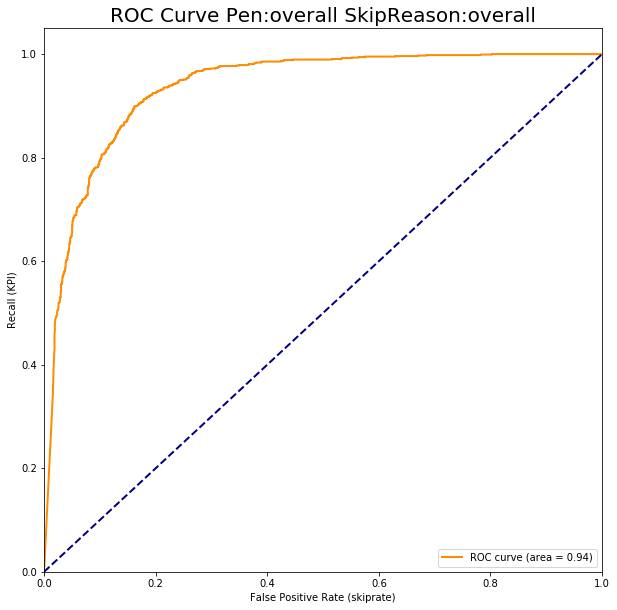

In [54]:
import matplotlib.pyplot as plt

results = []
all_pens = ['overall']
all_labels = ['overall']
nrows = len(all_pens)
ncols = len(all_labels)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10*ncols, 10*nrows))

pen_id, skip_reason='overall', 'overall'
if pen_id != 'overall':
    this_eval_set = eval_set[eval_set['pen_id'] == pen_id]
else:
    this_eval_set = eval_set
    
if skip_reason != 'overall' :
    skipped_with_this_reason = this_eval_set[skip_reason]
    accepted = this_eval_set['loaded_labels']
    #print(skipped_with_this_reason)
    #print(accepted)
    this_eval_set = this_eval_set[skipped_with_this_reason | accepted]
else:
    this_eval_set = this_eval_set
    
result, (fpr, tpr, thresholds) = evaluate(this_eval_set, pen_id, skip_reason)
results.append(result)
if fpr is not None:
    plot_roc(fpr, tpr, result['auc'], pen_id, skip_reason, axes)
    
out = pd.DataFrame.from_dict(results)
out.set_index(['pen_id', 'skip_reason'], inplace=True)
out.T

pen_id           overall                                            \
skip_reason      overall       BLURRY     BAD_CROP BAD_ORIENTATION   
n            2748.000000  2446.000000  1453.000000     1387.000000   
prec            0.790780     0.841509     0.938947        0.955032   
rec             0.859345     0.859345     0.859345        0.859345   
auc             0.935990     0.941811     0.933981        0.944069   

pen_id                                         66                         \
skip_reason  OBSTRUCTION     TOO_DARK     overall      BLURRY   BAD_CROP   
n            1323.000000  1449.000000  203.000000  150.000000  49.000000   
prec            0.963283     0.986726    0.523810    0.647059   0.611111   
rec             0.859345     0.859345    0.846154    0.846154   0.846154   
auc             0.945004     0.980773    0.975709    0.978664   0.933761   

pen_id                       ...          57                              \
skip_reason BAD_ORIENTATION  ...    BAD_CROP BAD_ORIENTATION OBSTRUCTION   
n                 35.000000  ...  291.000000      265.000000  279.000000   
prec               0.916667  ...    0.910526        0.961111    0.935135   
rec                0.846154  ...    0.891753        0.891753    0.891753   
auc                0.940559  ...    0.923159        0.956585    0.942996   

pen_id                          85                                        \
skip_reason    TOO_DARK    overall     BLURRY   BAD_CROP BAD_ORIENTATION   
n            208.000000  56.000000  55.000000  19.000000       16.000000   
prec           1.000000   0.263158   0.263158   0.714286        0.833333   
rec            0.891753   0.384615   0.384615   0.384615        0.384615   
auc            0.991163   0.695886   0.688645   0.743590        0.794872   

pen_id                              
skip_reason OBSTRUCTION   TOO_DARK  
n             13.000000  19.000000  
prec           1.000000   0.833333  
rec            0.384615   0.384615  
auc                 NaN   0.858974  

[4 rows x 60 columns]

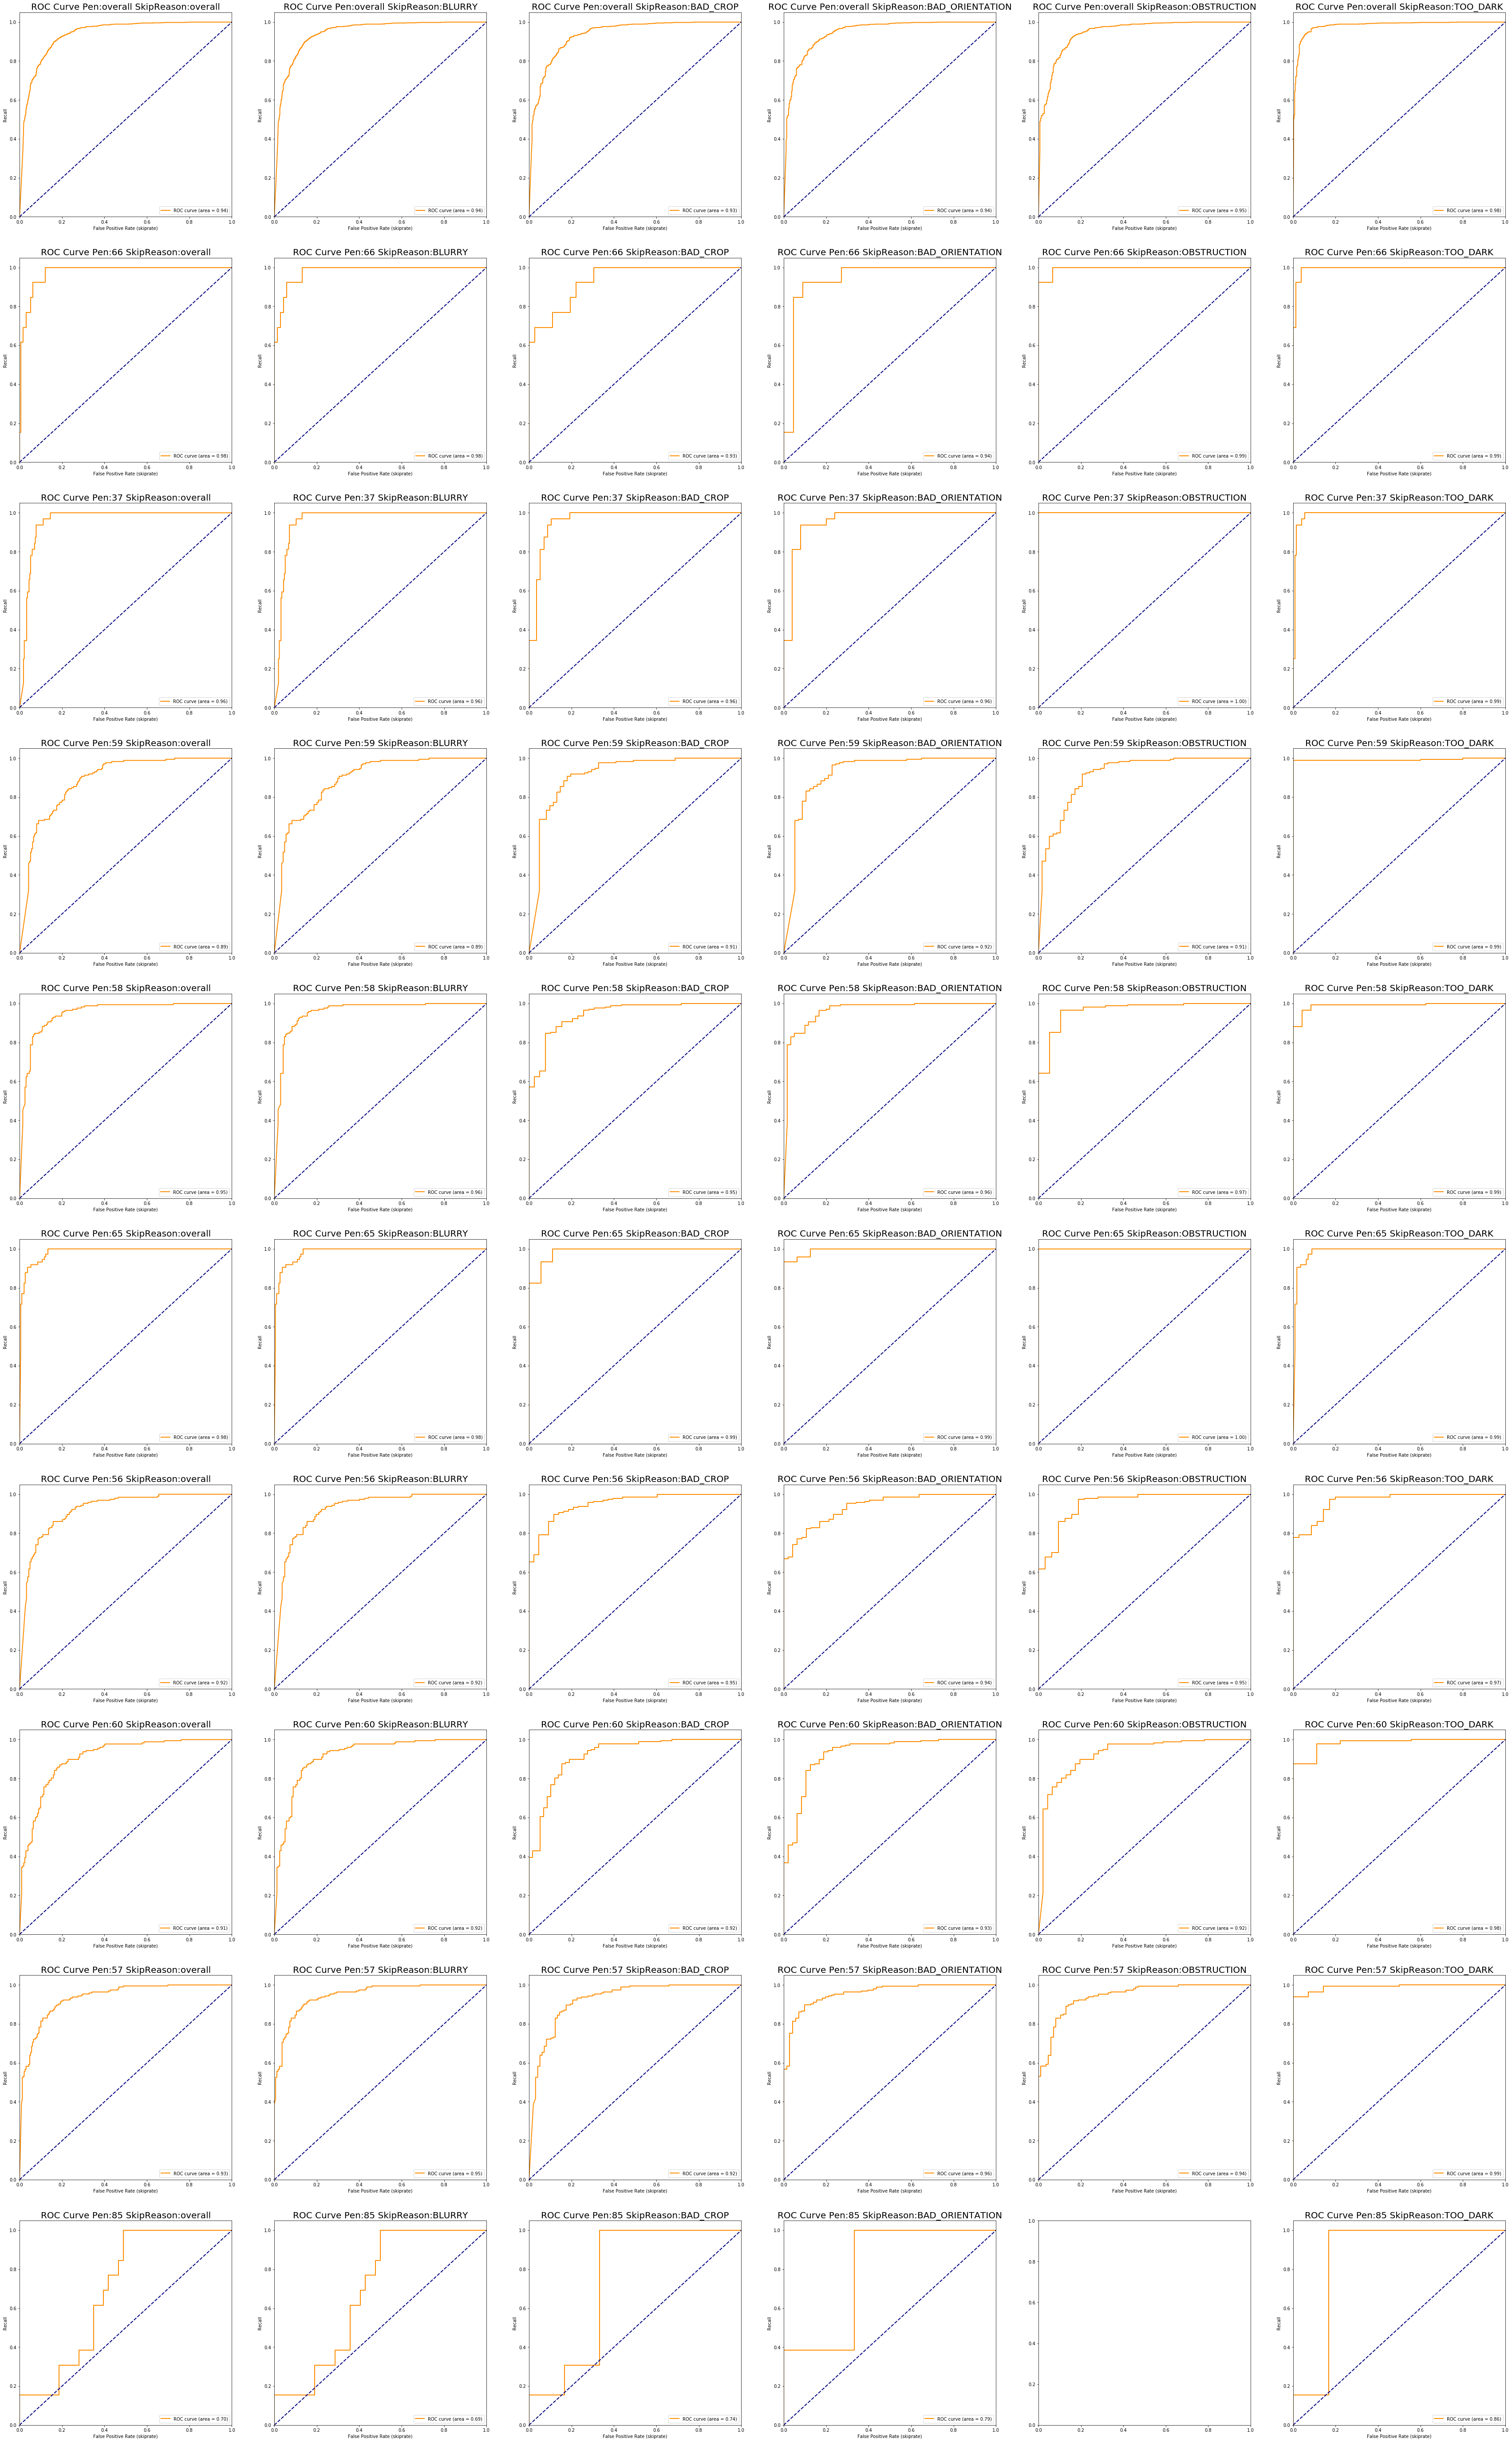

In [49]:
import matplotlib.pyplot as plt

results = []
all_pens = ['overall'] + list(eval_set['pen_id'].unique())
all_labels = ['overall'] + useful_labels
nrows = len(all_pens)
ncols = 1 + len(useful_labels)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10*ncols, 10*nrows))


for i, pen_id in enumerate(all_pens):
    for j, skip_reason in enumerate(all_labels):
        if pen_id != 'overall':
            this_eval_set = eval_set[eval_set['pen_id'] == pen_id]
        else:
            this_eval_set = eval_set
            
        if skip_reason != 'overall' :
            skipped_with_this_reason = this_eval_set[skip_reason]
            accepted = this_eval_set['loaded_labels']
            #print(skipped_with_this_reason)
            #print(accepted)
            this_eval_set = this_eval_set[skipped_with_this_reason | accepted]
        else:
            this_eval_set = this_eval_set
            
        result, (fpr, tpr, thresholds) = evaluate(this_eval_set, pen_id, skip_reason)
        results.append(result)
        if fpr is not None:
            plot_roc(fpr, tpr, result['auc'], pen_id, skip_reason, axes[i][j])
    
out = pd.DataFrame.from_dict(results)
out.set_index(['pen_id', 'skip_reason'], inplace=True)
out.T

In [50]:
out

n      prec       rec       auc
pen_id  skip_reason                                        
overall overall          2748  0.790780  0.859345  0.935990
        BLURRY           2446  0.841509  0.859345  0.941811
        BAD_CROP         1453  0.938947  0.859345  0.933981
        BAD_ORIENTATION  1387  0.955032  0.859345  0.944069
        OBSTRUCTION      1323  0.963283  0.859345  0.945004
        TOO_DARK         1449  0.986726  0.859345  0.980773
66      overall           203  0.523810  0.846154  0.975709
        BLURRY            150  0.647059  0.846154  0.978664
        BAD_CROP           49  0.611111  0.846154  0.933761
        BAD_ORIENTATION    35  0.916667  0.846154  0.940559
        OBSTRUCTION        28  1.000000  0.846154  0.994872
        TOO_DARK           91  0.916667  0.846154  0.994083
37      overall           301  0.586957  0.843750  0.957481
        BLURRY            284  0.613636  0.843750  0.958953
        BAD_CROP           89  0.870968  0.843750  0.961623
        BAD_ORIENTATION    57  0.931034  0.843750  0.957500
        OBSTRUCTION        55  1.000000  0.843750  1.000000
        TOO_DARK          159  0.931034  0.843750  0.990404
59      overall           384  0.743590  0.843023  0.885997
        BLURRY            316  0.805556  0.843023  0.887355
        BAD_CROP          233  0.941558  0.843023  0.912457
        BAD_ORIENTATION   229  0.953947  0.843023  0.919064
        OBSTRUCTION       230  0.935484  0.843023  0.913943
        TOO_DARK          177  1.000000  0.843023  0.991860
58      overall           366  0.850829  0.905882  0.949520
        BLURRY            337  0.895349  0.905882  0.955583
        BAD_CROP          209  0.962500  0.905882  0.945701
        BAD_ORIENTATION   230  0.950617  0.905882  0.962108
        OBSTRUCTION       189  0.987179  0.905882  0.965015
        TOO_DARK          194  0.993548  0.905882  0.990441
65      overall           261  0.904110  0.891892  0.983090
        BLURRY            258  0.904110  0.891892  0.982814
        BAD_CROP           92  0.985075  0.891892  0.986486
        BAD_ORIENTATION    90  1.000000  0.891892  0.993243
        OBSTRUCTION        81  1.000000  0.891892  1.000000
        TOO_DARK          187  0.970588  0.891892  0.986008
56      overall           376  0.807512  0.891192  0.919703
        BLURRY            355  0.843137  0.891192  0.921288
        BAD_CROP          236  0.971751  0.891192  0.951440
        BAD_ORIENTATION   240  0.939891  0.891192  0.936060
        OBSTRUCTION       225  0.971751  0.891192  0.952073
        TOO_DARK          228  0.971751  0.891192  0.966247
60      overall           378  0.832335  0.785311  0.905163
        BLURRY            334  0.891026  0.785311  0.916982
        BAD_CROP          235  0.952055  0.785311  0.920709
        BAD_ORIENTATION   225  0.965278  0.785311  0.927848
        OBSTRUCTION       223  0.965278  0.785311  0.924466
        TOO_DARK          186  1.000000  0.785311  0.981795
57      overall           423  0.812207  0.891753  0.933125
        BLURRY            357  0.887179  0.891753  0.947378
        BAD_CROP          291  0.910526  0.891753  0.923159
        BAD_ORIENTATION   265  0.961111  0.891753  0.956585
        OBSTRUCTION       279  0.935135  0.891753  0.942996
        TOO_DARK          208  1.000000  0.891753  0.991163
85      overall            56  0.263158  0.384615  0.695886
        BLURRY             55  0.263158  0.384615  0.688645
        BAD_CROP           19  0.714286  0.384615  0.743590
        BAD_ORIENTATION    16  0.833333  0.384615  0.794872
        OBSTRUCTION        13  1.000000  0.384615       NaN
        TOO_DARK           19  0.833333  0.384615  0.858974